In [12]:
from sklearn.datasets import fetch_openml, load_digits
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import math

In [13]:
def Euclidean_distance(row1,row2):
    distance=0
    for i in range(len(row1)-1):
        distance+=(row1[i]-row2[i])**2
    return np.sqrt(distance)


In [14]:
def Get_Neighbors(train, test_row, num):
    distance=list()
    data=list()
    for i in train:
        dist=Euclidean_distance(test_row,i)
        distance.append(dist)
        data.append(i)    
    distance = np.array(distance)
    data = np.array(data)
        
#Finding the index in ascending order
    index_dist = distance.argsort()
#Arranging data according to index
    data = data[index_dist]
#slicing k value from number of data
    neighbors = data[:num]
 
    return neighbors  

In [15]:
def predict_classification(train, test_row, num):
    
    Neighbors = Get_Neighbors(train, test_row, num)
    
    Classes = []
    
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)   
    return prediction

In [16]:
def accuracy(y_true,y_pred):
    n_correct=0
    for i in range(len(y_true)):
        if y_true[i]== y_pred[i]:
            n_correct+=1
        acc=n_correct/len(y_true)
        return acc

In [6]:
mnist = fetch_openml('mnist_784') #load_digits()

In [7]:
#mnist = load_digits()

In [17]:
# checking the column names and preprocessing target values in standard format
mnist.keys()
mnist.target = mnist.target.astype(np.int8)



In [18]:
#Determining independent and dependent variable and finding the shape
x = np.array(mnist.data)
y = np.array(mnist.target)
x.shape, y.shape


((70000, 784), (70000,))

In [19]:
# shuffling the values of x and y
si = np.random.permutation(x.shape[0])
x = x[si]
y = y[si]

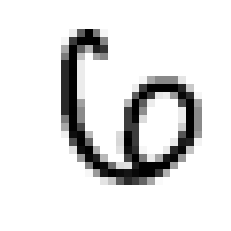

In [20]:
some_digit = x[12]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()


In [21]:
#slicing data
trainx = x[:2000]
trainy = y[:2000]
#Inserting trainy in trainx
train = np.insert(trainx, 784, trainy, axis = 1)
prediction = predict_classification(train, train[1244], 4)
prediction

3.0

In [22]:
train[1244][-1]


3.0

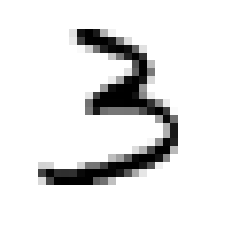

In [23]:
#Plotting the output
some_digit = train[1244][:-1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()


In [24]:
y_pred=[]
y_true=train[:,-1]
for i in range(len(train)):
    prediction = predict_classification(train, train[i], 4)
    y_pred.append(prediction)
# Accuracy
accuracy(y_true, y_pred)


0.0005